# Исследование объявлений о продаже квартир

Задачи:
- Научиться определять рыночную стоимость объектов недвижимости;
- установить параметры для построения автоматизированной системы, которая отследит аномалии и мошенническую деятельность. 

План Работы:

- Загрузка исходных данных;
- подготовка данных;
- исследовательский анализ и ответы на поставленные вопросы;
- формирование выводов

 Данные — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. По каждой продаваемой квартире есть два вида данных. Первые — вносили сами пользователи при публикации объявлений, вторые — получены на основе картографических данных: расстояния до центра, аэропорта, ближайшего парка и водоёма.
 
 Описание данных:
 
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- Описание проекта 4
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep ='\t')
df.info()
df.columns     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [3]:
pd.set_option('display.max_columns', 30) 
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Расстояние до аэропорта, центра берется прямолинейно (отрезок на карте) или кратчайший путь до аэропорта и центра соотвтетственно?

### Вывод 
Видим большое количество пропущенных значений: 1) ceiling_height, floors_total, living_area,  kitchen_area, locality_name - скорей всего это данные, вносимые пользователем, их не заполнили сами пользователи по каким-то причинам (скорей всего это непривлекательные характеристики жилья, возможно случайно пропустили или не знали точные значения).Также возможно проблемы в выгрузке. locality_name - скорей всего пропустили случайно, так как без наличия этой характеристики дом продать нельзя. Данную характеристику лучше запросить у продавца, но можно и по остальным характеристикам определить наиболее вероятную локацию для предложения.

2) days_exposition - пропуски могут быть обусловлены тем, что объявление еще не снято, также возможно проблемы в выгрузке.

3) is_apartment - скорей всего пользователи тут ничего не писали, так как не знали, что имеется ввиду или хотели это скрыть. Данный фактор можно отследить соотношением цены и других факторов в таблице, так как апартаменты как правило дешевле квартир. 

4) balcony - Возможны случайные пропуски, оданко скорей всего люди без балконов просто не заполняли этот пункт. Заполним пропуски 0.

5) airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest - Данные полученные на основе картографическиз данных, возможны проблемы в обработке (например, в отдаленных районах можно разными путями добираться до аэропорта и следовательно будут разные расстояния), проблемы в выгрузке. Необходимо проверить, что parks_around3000 соответствует верное parks_nearest и ponds_around3000 соответствует ponds_nearest.

### Шаг 2. Предобработка данных

In [4]:
df.columns = df.columns.str.lower()  # Привели к нижнему регистру 'cityCenters_nearest'
df.columns                           # Исправил

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'citycenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [5]:
### Код ревьювера ###

#df.columns = df.columns.str.lower()

In [6]:
df['is_apartment'].sum() # Проверка, возможно все значения были 1,
                         # тогда можно было предположить, что остальные 0 

50

In [7]:
df['balcony'] = df['balcony'].fillna(0) # Замена пропущенных значений в количестве балконов на 0
df['balcony'].isna().sum()              #  Проверка

0

In [8]:
display(df.pivot_table(index = 'parks_around3000', values = 'parks_nearest', aggfunc = ['max', 'count']))       # Проверка
display(df.pivot_table(index = 'parks_around3000', values = 'parks_nearest', aggfunc = 'min'))
display(df.pivot_table(index = 'parks_around3000', values = 'parks_nearest', aggfunc = ['max', 'count']).sum())
display(df.pivot_table(index = 'ponds_around3000', values = 'ponds_nearest', aggfunc = ['max', 'count']))
display(df.pivot_table(index = 'ponds_around3000', values = 'ponds_nearest', aggfunc = 'min'))
display(df.pivot_table(index = 'ponds_around3000', values = 'ponds_nearest', aggfunc = ['max', 'count']).sum())

,max,count
,parks_nearest,parks_nearest
parks_around3000,,
0.0,3190.0,4
1.0,2984.0,5681
2.0,2747.0,1747
3.0,700.0,647


,parks_nearest
parks_around3000,
0.0,3013.0
1.0,1.0
2.0,9.0
3.0,4.0


max    parks_nearest    9621.0
count  parks_nearest    8079.0
dtype: float64

,max,count
,ponds_nearest,ponds_nearest
ponds_around3000,,
0.0,NaN,0
1.0,1344.0,5717
2.0,1096.0,1892
3.0,950.0,1501


,ponds_nearest
ponds_around3000,
1.0,20.0
2.0,13.0
3.0,22.0


max    ponds_nearest    3390.0
count  ponds_nearest    9110.0
dtype: float64

In [9]:
display(df.query('ponds_around3000.isna()').count())

total_images            5518
last_price              5518
total_area              5518
first_day_exposition    5518
rooms                   5518
ceiling_height          2943
floors_total            5508
living_area             4895
floor                   5518
is_apartment             628
studio                  5518
open_plan               5518
kitchen_area            4803
balcony                 5518
locality_name           5510
airports_nearest           0
citycenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         4653
dtype: int64

Пропуски совпадают в стоблцах: airports_nearest, citycenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest.

In [10]:
df.query('ponds_around3000.isnull()')['locality_name'].unique() # Определяем географию, где не были определены расстояния

array(['городской посёлок Янино-1', 'посёлок Мурино', 'Сертолово',
       'деревня Кудрово', 'Коммунар',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кировск',
       'деревня Новое Девяткино', 'Санкт-Петербург',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'деревня Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Сясьстрой', 'деревня Старая', 'деревня Лесколово',
       'посёлок Новый Свет', 'Сланцы', 'село Путилово', 'Ивангород',
       'Мурино', 'Шлиссельбург', 'Никольское', 'Сосновый Бор',
       'поселок Новый Свет', 'деревня Оржицы', 'деревня Кальтино',
 

In [11]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,False,False,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,False,False,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [83]:
df['floors_total'].astype('Int64') # Изменил тип данных, так как значения столбца должны быть целочисленными
df['floors_total']

1        11.0
2         5.0
5        12.0
6        26.0
7        24.0
         ... 
23692     5.0
23693     9.0
23695     5.0
23696     3.0
23698     5.0
Name: floors_total, Length: 20703, dtype: float64

In [13]:
df['balcony'].astype('int') # Изменил тип данных, так как значения столбца должны быть целочисленными
df['balcony'].value_counts()

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

In [82]:
df['last_price'].astype('Int64')
df['last_price']

1        3350000.0
2        5196000.0
5        2890000.0
6        3700000.0
7        7915000.0
           ...    
23692    1350000.0
23693    4600000.0
23695    3100000.0
23696    2500000.0
23698    1350000.0
Name: last_price, Length: 20703, dtype: float64

In [15]:
df.duplicated().sum() # Проверка дубликатов

0

Привели все названия колонок к нижнему регистру, проанализировали целесообразность заполнения пропусков, заполнили пропуски в столбце balcony. обнаружили, что пропуски совпадают в стоблцах: airports_nearest, citycenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest. Возможно по этим квартирам нет геоданных. Увидели, что география у пропущенных значений обширная. Перевели столбец с датой публикации в формат даты, а также 'floors_total' и 'balcony' в int. Дубликатов в таблице не выявлено.

### Шаг 3. Посчитайте и добавьте в таблицу

In [16]:
df['meter_price'] = df['last_price'] / df['total_area'] # Добавли цену квадратного метра
df['meter_price']

0        120370.370370
1         82920.792079
2         92785.714286
3        408176.100629
4        100000.000000
             ...      
23694     72490.845228
23695     52542.372881
23696     44091.710758
23697    149511.400651
23698     41795.665635
Name: meter_price, Length: 23699, dtype: float64

In [17]:
df['day_public'] = pd.DatetimeIndex(df['first_day_exposition']).weekday  # Добавили день недели, месяц 
df['month_public'] = pd.DatetimeIndex(df['first_day_exposition']).month  #  и год публикации объявления
df['year_public'] = pd.DatetimeIndex(df['first_day_exposition']).year
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,day_public,month_public,year_public
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72490.845228,1,3,2017
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,False,False,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,52542.372881,0,1,2018
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,False,False,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44091.710758,6,2,2018
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,149511.400651,1,3,2017


In [18]:
def flat_flor(row):                            # Добавляем столбец со значениями этажа
    if row['floor'] == 1:
        return "первый"
    elif row['floor'] == row['floors_total']:
        return 'последний'
    elif not pd.isna(row['floors_total']):
        return 'другой'
    else:
        return 'неизвестно'
    
df['flat_flor'] = df.apply(flat_flor, axis = 1)

In [19]:
df['flat_flor'].value_counts() # Проверка

другой        17363
последний      3336
первый         2917
неизвестно       83
Name: flat_flor, dtype: int64

In [20]:
df['live_to_toal_area'] = df['living_area'] / df['total_area']       # Соотношение жилой и общей площади
df['kitchen_to_total_area'] = df['kitchen_area'] / df['total_area']  # Соотнношение площади кухни к общей

In [21]:
df # Проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,day_public,month_public,year_public,flat_flor,live_to_toal_area,kitchen_to_total_area
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,NaN,NaN
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72490.845228,1,3,2017,другой,0.547792,0.103356
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,False,False,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,52542.372881,0,1,2018,другой,0.644068,0.144068
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,False,False,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44091.710758,6,2,2018,первый,0.523810,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,149511.400651,1,3,2017,другой,NaN,0.303583


Необходимые для анализа данные посчитанны и вставленны в исходную таблицу. Можно переходить к анализу

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

Наиболее важные характеристики на мой взгляд: 
    - locality_name — название населённого пункта
    - is_apartment — апартаменты (булев тип)
    - last_price — цена на момент снятия с публикации
    - total_area — площадь квартиры в квадратных метрах (м²)
    - citycenters_nearest — расстояние до центра города (м)
    - ceiling_height — высота потолков (м)
    - rooms — число комнат

In [22]:
import matplotlib.pyplot as plt

In [23]:
def visualization(column, range_min, range_max):
    df.boxplot(column = column)
    plt.show()
    print(df[column].describe())
    df[column].hist(bins=50)
    plt.show()
    df[column].hist(bins=30,range=(range_min, range_max))
    plt.show()

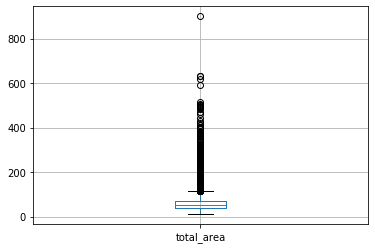

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


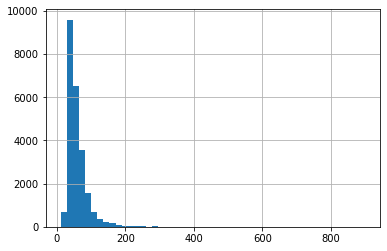

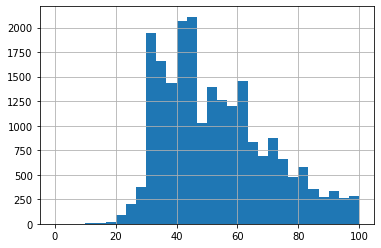

In [24]:
visualization('total_area', 0, 100)

In [25]:
import numpy as np # Нашел такой вариант для выделения квантилей и границ нормальных значений.

In [26]:
Q1_total_area = np.percentile(df['total_area'], 25, interpolation = 'midpoint')
Q3_total_area = np.percentile(df['total_area'], 75, interpolation = 'midpoint')
IQR_total_area = Q3_total_area - Q1_total_area
IQR_total_area

29.900000000000006

In [27]:
min_norm_total_area = Q1_total_area - IQR_total_area
max_norm_total_area = Q3_total_area + IQR_total_area
print(min_norm_total_area)
print(max_norm_total_area)

10.099999999999994
99.80000000000001


Типичная площадь квартир в выборке 30 - 70 м². Большое стандартное отклонение, следовательно разброс значений большой (в нашем случае есть несколько квартир сильно отличающихся по площади от стандарта).

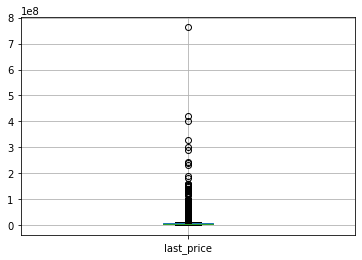

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


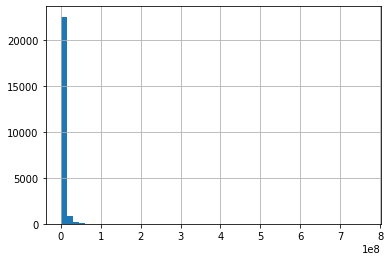

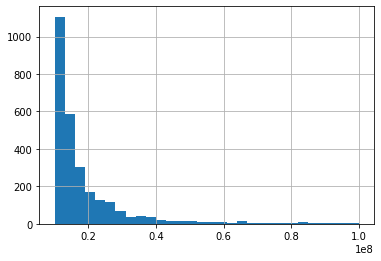

In [28]:
visualization('last_price', 1e+07, 1e+08) 

In [29]:
Q1_last_price = np.percentile(df['last_price'], 25, interpolation = 'midpoint')
Q3_last_price = np.percentile(df['last_price'], 75, interpolation = 'midpoint')
IQR_last_price = Q3_last_price - Q1_last_price
IQR_last_price

3400000.0

In [30]:
min_norm_last_price = Q1_last_price - IQR_last_price
max_norm_last_price = Q3_last_price + IQR_last_price
print(min_norm_last_price)
print(max_norm_last_price)

0.0
10200000.0


Типичная цена квартир в выборке 3,5 - 6,8 млн. Большое стандартное отклонение, следовательно разброс значений большой (в нашем случае есть несколько квартир сильно отличающихся по площади от стандарта).

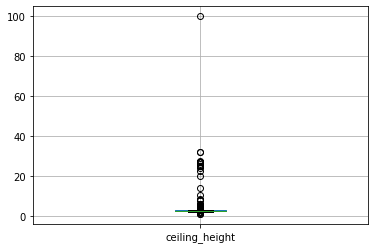

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


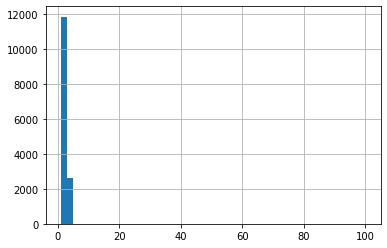

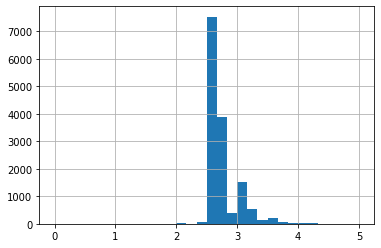

In [31]:
visualization('ceiling_height', 0, 5)

2.5-2.8 м. - типичные значения высоты потолков. 

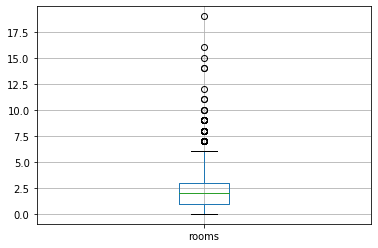

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


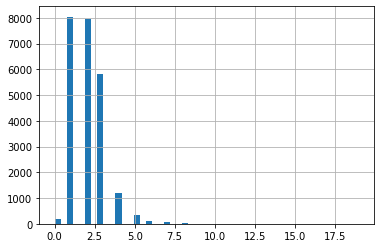

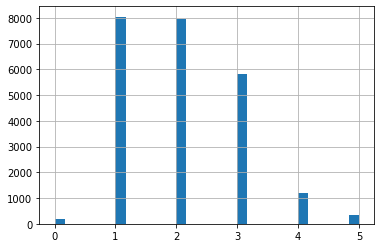

In [32]:
visualization('rooms', 0, 5)

1     8244
2     7940
3     5814
4     1180
5      326
6      105
7       59
8       12
9        8
10       3
14       2
11       2
15       1
12       1
19       1
16       1
Name: rooms, dtype: int64

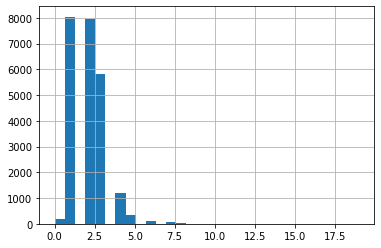

In [33]:
df['rooms'].hist(bins=30)
df['rooms'] = df['rooms'].replace(0, 1)
df['rooms'].describe()
display(df['rooms'].value_counts())

Подавляющее большинство квартир продается с числом комнт 1-3.

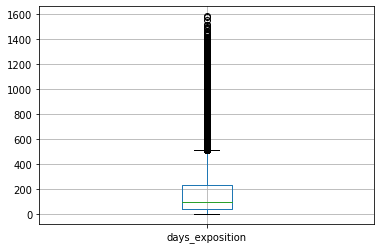

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


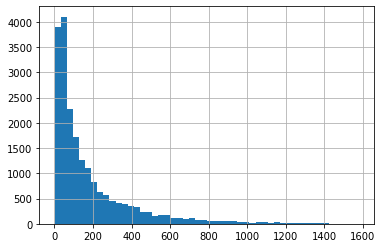

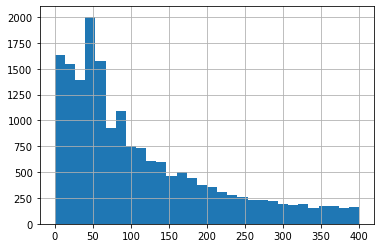

In [34]:
visualization('days_exposition', 0, 400)

Процесс типичной продажи из выборки длится 25 - 200 дней. Продажа прошла быстро если заняла менее 45 дней. Необычно долгая продажа это более 250 дней. 

In [35]:
df= df.query('last_price <= @max_norm_last_price and total_area <= @max_norm_total_area') # Убрали квартиры с очень большой ценой и площадью
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20703 entries, 1 to 23698
Data columns (total 29 columns):
total_images             20703 non-null int64
last_price               20703 non-null float64
total_area               20703 non-null float64
first_day_exposition     20703 non-null datetime64[ns]
rooms                    20703 non-null int64
ceiling_height           12469 non-null float64
floors_total             20634 non-null float64
living_area              19098 non-null float64
floor                    20703 non-null int64
is_apartment             2400 non-null object
studio                   20703 non-null bool
open_plan                20703 non-null bool
kitchen_area             18707 non-null float64
balcony                  20703 non-null float64
locality_name            20663 non-null object
airports_nearest         15274 non-null float64
citycenters_nearest      15286 non-null float64
parks_around3000         15286 non-null float64
parks_nearest            6246 non-n

In [36]:
### Код ревьювера ###

len(df) / 23699

0.8735811637621841

In [37]:
display((df
    .corr()['last_price']
    .sort_values(ascending=False)
    .to_frame()
    .style
    .background_gradient(cmap='Greens')
))
print()
display(df
        .corr()['meter_price']
        .sort_values(ascending=False)
        .to_frame()
        .style
        .background_gradient(cmap='Greens')
)

,last_price
last_price,1
total_area,0.65598
meter_price,0.631631
living_area,0.523428
kitchen_area,0.435829
rooms,0.402037
floors_total,0.218036
total_images,0.16299
floor,0.147602
ponds_around3000,0.115906


,meter_price
meter_price,1
last_price,0.631631
floors_total,0.35064
kitchen_to_total_area,0.315627
floor,0.253248
kitchen_area,0.211169
total_images,0.114792
parks_around3000,0.0820452
year_public,0.0744653
ponds_around3000,0.0722808


In [38]:
(df
    .corr()['last_price']
    .sort_values(ascending=False)
    .to_frame()
    .style
    .background_gradient(cmap="Greens")
)

,last_price
last_price,1
total_area,0.65598
meter_price,0.631631
living_area,0.523428
kitchen_area,0.435829
rooms,0.402037
floors_total,0.218036
total_images,0.16299
floor,0.147602
ponds_around3000,0.115906


СПАСИБО)

Больше всего положительно влияют на стоимость квартиры соответственно: цена м², общая площадь квартиры, жилая площадь м², площадь кухни м², количество комнат, этажность дома, этаж и число фотографий в объявление.
Фактор наиболее сильно отрицательно влияющий на цену - это удаленность от центра.
Видно, что жилая и кухонная площадь положительно коррелируют с ценой, однако чем больше эти площади относительно общей площади тем цена ниже. Следовательно факторы жилой и общей площади не стоит рассматривать отдельно, они оказывают положительное влияние на цену только потому, что увеличивается общая площадь, но при увеличение своей доли относительно общей могут повлиять негативно.

In [40]:
def dependence (x):                                           # Функция для выявления взаимосвязи с ценой
    df.plot(x= x, y = 'meter_price', kind= 'scatter',alpha=0.3)
    plt.show()
    df.plot(x= x, y = 'meter_price', kind='hexbin', gridsize=20, sharex=False)
    plt.show()
    print(df[x].corr(df['meter_price']))

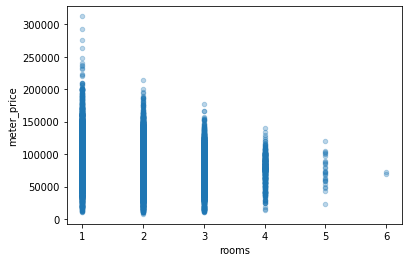

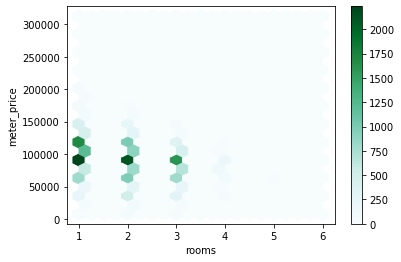

-0.2598438016280346


In [41]:
dependence ('rooms')

Чем больше комнат, тем меньше стоимость м². Наверняка это связано с тем, что если в квартире больше комнат, то и ее площадь будет больше, а если площадь больше, то цена за м² ниже.

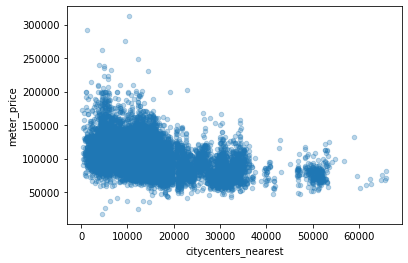

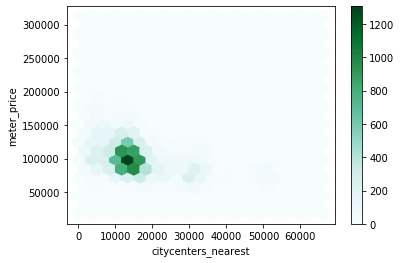

-0.39797604945322035


In [42]:
dependence ('citycenters_nearest')

Цена м² становится дешевле при увелечение расстояния от квартиры до центра.

In [43]:
def dictionary_flat_flor(flat_flor):   # Присвоение цифр категориям этажа (создание словаря)
    if flat_flor == 'неизвестно':
        return 0
    elif flat_flor == 'первый':
        return 1
    elif flat_flor == 'другой':
        return 2
    elif flat_flor == 'последний':
        return 3

In [44]:
df['dictionary_flat_flor'] = df['flat_flor'].apply(dictionary_flat_flor)
df['dictionary_flat_flor'].value_counts()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


2    15063
3     2846
1     2728
0       66
Name: dictionary_flat_flor, dtype: int64

In [45]:
def dependence_2(column):
    median_value=df.groupby(column)['meter_price'].median()
    median_value.plot(x=column, y='meter_price', style='o-', grid=True)
    plt.show()
    print(df[column].corr(df['meter_price']))

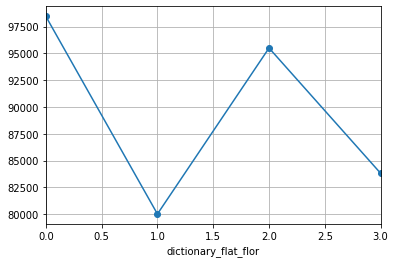

0.026817848595218047


In [46]:
dependence_2('dictionary_flat_flor')

Медианная цена за м² первого этажа имеет наименьшую стоимость, на 3,5% дороже стоит м² последнего этажа, другие этажи стоят примерно на 19% дороже первого. Есть еще квартиры, где этаж неопределн, но цена самая высокая. Данная картина возможно возникла из-за того, что большинство новых домов имеют много этажей (следовательно больше этажей категории "другой"), квартиры в таких домах стоят дороже, а старые дома имеют меньшую этажность (меньше этажей категории "другой") и меньшую стоимость.

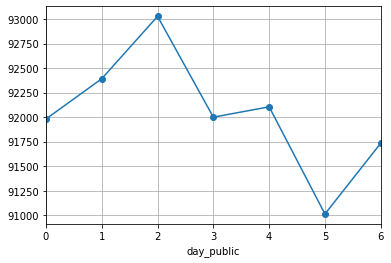

-0.009548227523312865


In [47]:
dependence_2('day_public')

Цена за квадратный метр дороже в предложениях, выложенных в будние дни (самая большая в середине -среда). Возможно это связано с тем, что те, кто выкладывают объявление по будням, они больше времени и сил могут тратить на продажу квартиры и следовательно продают ее удачнее, например тех, кто продает срочно и выкраивает время на выходных.

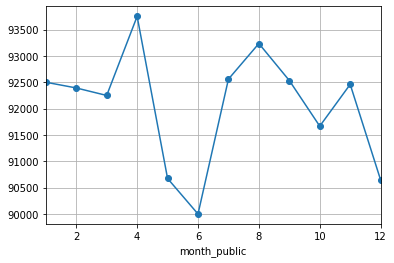

-0.004642825235988877


In [48]:
dependence_2('month_public')    

Месяц публикации не влияет на цену м² исходя из коэффициента кореляции, но по графику видно, что наиболее дешего стоит м² квартир, выставляемых на продажу в 5, 6 и 12 месяцах, причем разница составляет порядка 2%. Возможно это связано с колебаниями на рынке недвижимости.

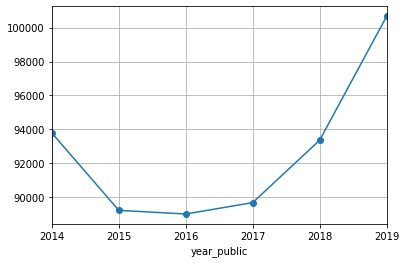

0.07446532821888713


In [49]:
dependence_2('year_public')

С 2014 по 2015 года виден спад стоимости м² квартиры, а вот после стабильности 2015-2016 гг. начался ускоренный рост цен вплоть до 2019 года. Это скорей всего связанно с ситуацией на рынке недвижимости и с мировой экономикой.

Вывод: 
- Чем больше комнат, тем меньше стоимость м². 
- Цена м² становится дешевле при увелечение расстояния от квартиры до центра. 
- Медианная цена за м² первого этажа имеет наименьшую стоимость, на 3,5% дороже стоит м² последнего этажа, другие этажи стоят примерно на 19% дороже первого. Есть еще квартиры, где этаж неопределн, но цена самая высокая. 
- Цена за квадратный метр дороже в предложениях, выложенных в будние дни
- Месяц публикации не влияет на цену м² исходя из коэффициента кореляции, но по графику видно, что наиболее дешего стоит м² квартир, выставляемых на продажу в 5, 6 и 12 месяцах
- С 2014 по 2015 года виден спад стоимости м² квартиры, а вот после стабильности 2015-2016 гг. начался ускоренный рост цен вплоть до 2019 года

In [50]:
top_locathion = df['locality_name'].value_counts()   # Выделили 10 населенных пунктов с наибольшим количеством объявлений
top_locathion.head(10)

Санкт-Петербург      12930
посёлок Мурино         522
посёлок Шушары         431
Всеволожск             388
Колпино                332
Пушкин                 330
посёлок Парголово      324
Гатчина                300
деревня Кудрово        297
Выборг                 222
Name: locality_name, dtype: int64

count     16076.000000
mean     100063.415420
std       23637.735853
min       10897.435897
25%       84664.536741
50%       98000.000000
75%      113003.012048
max      312240.000000
Name: meter_price, dtype: float64

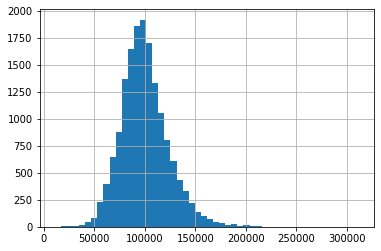

In [51]:
df.query('locality_name in @top_locathion.head(10).index')['meter_price'].hist(bins=50)
df.query('locality_name in @top_locathion.head(10).index')['meter_price'].describe()

In [52]:
df.query('locality_name in @top_locathion.head(10).index').groupby('locality_name')['meter_price'].mean().sort_values(ascending=False)

locality_name
Санкт-Петербург      104845.607242
Пушкин               100137.198962
деревня Кудрово       92392.915308
посёлок Парголово     90494.580056
посёлок Мурино        85752.189195
посёлок Шушары        78788.184435
Колпино               75322.233737
Гатчина               68680.532752
Всеволожск            66736.860169
Выборг                58261.963025
Name: meter_price, dtype: float64

Самая высокая стоимость жилья из выборки (10 населенных пунктов с наибольшим количеством объявлений) в Санкт-Петербурге 101448, самая низкая в Выборге - 58239, разница почти в 2 раза.

In [62]:
df_piter = df.query('locality_name == "Санкт-Петербург"')
df_piter['citycenters_nearest']

2        13933.0
7        11634.0
9        15008.0
10       13878.0
15       14259.0
          ...   
23686    11602.0
23687    16704.0
23689    16081.0
23690     6263.0
23691     4489.0
Name: citycenters_nearest, Length: 12930, dtype: float64

In [63]:
display(df['rooms'].value_counts())
df_piter['rooms'] = df_piter['rooms'].replace(0,1)
display(df_piter['rooms'].value_counts())

1    8174
2    7388
3    4565
4     546
5      28
6       2
Name: rooms, dtype: int64

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1    4980
2    4580
3    2953
4     399
5      17
6       1
Name: rooms, dtype: int64

In [64]:
df_piter['citycenters_nearest_km'] = (df_piter['citycenters_nearest'] / 1000).round()
df_piter['citycenters_nearest_km']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


2        14.0
7        12.0
9        15.0
10       14.0
15       14.0
         ... 
23686    12.0
23687    17.0
23689    16.0
23690     6.0
23691     4.0
Name: citycenters_nearest_km, Length: 12930, dtype: float64

In [65]:
df_piter_groupby = df_piter.groupby('citycenters_nearest_km')['meter_price'].mean()
display(df_piter_groupby)

citycenters_nearest_km
0.0     123148.059224
1.0     120090.951498
2.0     115118.009426
3.0     109296.043425
4.0     116669.212558
5.0     121330.343985
6.0     121876.497696
7.0     114931.413760
8.0     114516.372666
9.0     105860.991633
10.0    107287.490762
11.0    103803.434982
12.0    105231.846999
13.0    105526.987477
14.0    103352.034372
15.0    102055.320024
16.0     99159.514912
17.0     94882.776529
18.0     95847.743571
19.0     97584.689878
20.0    102608.778336
21.0     93867.634806
22.0     91274.783996
23.0     91388.397623
24.0     85736.904595
25.0     91531.371618
26.0     89483.681912
27.0     70312.500000
28.0     83277.489795
29.0     72953.365445
Name: meter_price, dtype: float64

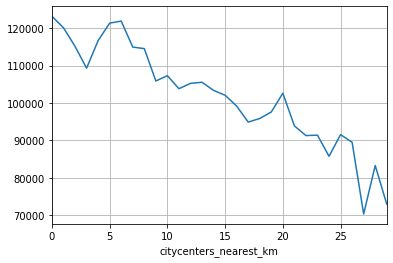

In [66]:
df_piter_groupby.plot(x='citycenters_nearest_km', y ='meter_price', grid = True)
plt.show()

График на отметках от 0 до 8 км. имеет максимальную цену, далее идет стремительное постепенное снижение цены. На мой взгляд - центральная зона - 8 км. так как после 8 км. график перестает колебаться и стабильно идет вниз (1-о исключение есть), после 24 км. график опять начинает качать, следовательно можно выделить и интервалы 8-24 км.(расстояние от центра сильно сказывается на стоимости) и 24 км.+ от центра как отдельный сегмент. Это может свидетельствовать о том, что сильнее начинают влиять на цену другие факторы, нежели расстояние до центра.

In [67]:
df_piter_center = df_piter.query('citycenters_nearest_km <= 8')
df_piter_center['rooms'].value_counts()

2    925
3    627
1    624
4    125
5      7
Name: rooms, dtype: int64

In [68]:
def visualization_piter_center(column):
    df_piter_center.boxplot(column = column)
    plt.show()
    print(df_piter_center[column].describe())
    df_piter_center[column].hist(bins=50)
    plt.show()

In [69]:
def dependence_piter_center (x):                                           # Функция для выявления взаимосвязи с ценой
    df_piter_center.plot(x= x, y = 'meter_price', kind= 'scatter',alpha=0.5)
    plt.show()
    df_piter_center.plot(x= x, y = 'meter_price', kind='hexbin', gridsize=20, sharex=False)
    plt.show()
    print(df_piter_center[x].corr(df_piter_center['meter_price']))

In [70]:
def dependence_3(column):
    median_value=df_piter_center.groupby(column)['meter_price'].median()
    median_value.plot(x=column, y='meter_price', style='o-', grid=True)
    plt.show()
    print(df_piter_center[column].corr(df_piter_center['meter_price']))

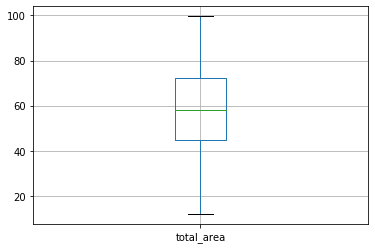

count    2308.000000
mean       59.228176
std        18.171607
min        12.000000
25%        45.000000
50%        58.000000
75%        72.225000
max        99.600000
Name: total_area, dtype: float64


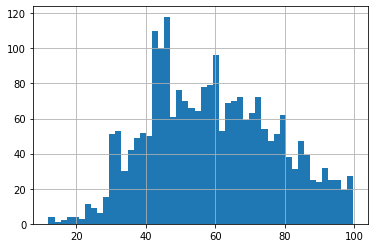

In [71]:
visualization_piter_center('total_area')

Типичные центральные квартиры в Питере имеют площадь 45-72 м². Во всем городе этот показатель 37-56 м².Это говорит о том, что квартиры в центре Питера обычно немного больше квартир по выборке.

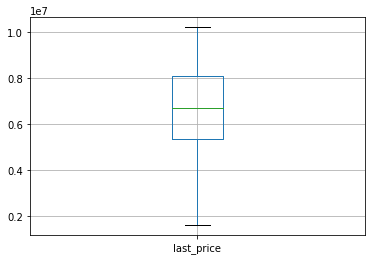

count    2.308000e+03
mean     6.691862e+06
std      1.819955e+06
min      1.600000e+06
25%      5.327601e+06
50%      6.700000e+06
75%      8.100000e+06
max      1.020000e+07
Name: last_price, dtype: float64


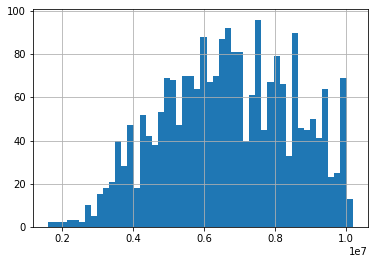

In [72]:
visualization_piter_center('last_price')

Типичная цена центральных Питерских квартир 4.7 - 6.0 млн.,  а в среднем по выборке 3.1-4.9 млн. Следовательно цены на вкартиры в Питере больше чем в среднем по выборке. Существенная разница в цене еще без учета того, что в основной выборке большую часть занимает сам Питер.

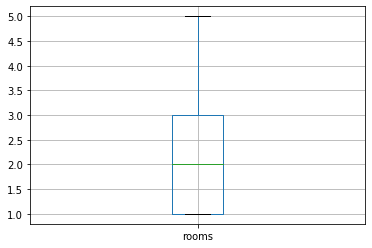

count    2308.000000
mean        2.118718
std         0.878751
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: rooms, dtype: float64


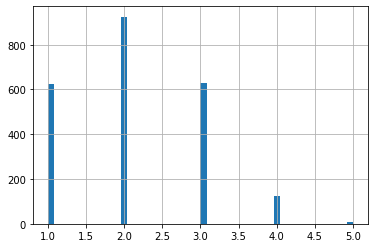

In [73]:
visualization_piter_center('rooms')

В центре Питера больше всего 2-ух комнатных квартир, на 30% меньше однакомнатных и трехкомнатных,  около 100 четырехкомнатных и совсем немного 5-ти комнатных. В основной же выборке преобладают однакомнатные квартиры, чуть меньше 2- комнатных и еще меньше трехкомнатных. Следовательно в центре Питера большее комнат чем в квартирах по средней выборке.

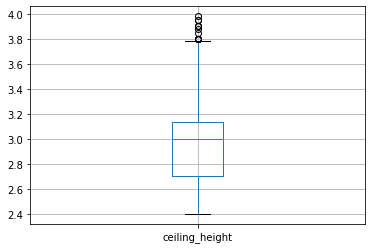

count    1466.000000
mean        3.024325
std         1.309310
min         2.400000
25%         2.700000
50%         3.000000
75%         3.150000
max        32.000000
Name: ceiling_height, dtype: float64


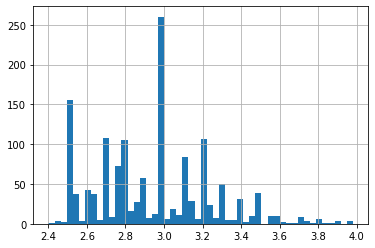

In [74]:
df_piter_center.query('ceiling_height < 4').boxplot(column = 'ceiling_height')
plt.show()
print(df_piter_center['ceiling_height'].describe())
df_piter_center.query('ceiling_height < 4')['ceiling_height'].hist(bins=50)
plt.show()

Высота потолков в центральных Питерских квартирах по большей части 2.7-3.2 м., что по сравнению со всей выборкой (2.5-2.7 м.) намного больше.

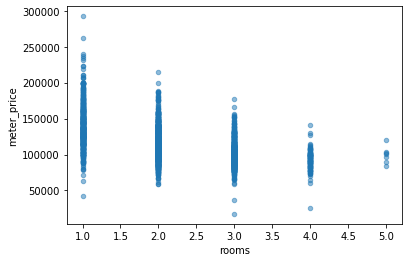

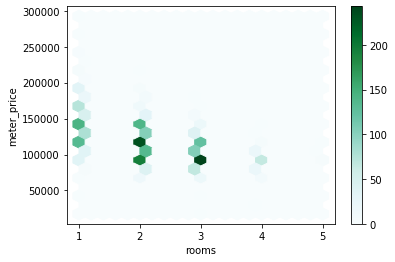

-0.5335564712968784


In [75]:
dependence_piter_center ('rooms')

Чем больше комнат, тем меньше стоимость м². Наверняка это связано с тем, что если в квартире больше комнат, то и ее площадь будет больше, а если площадь больше, то цена за м² ниже. Кореляция примерно в 2 раза больше чем в полной выборке

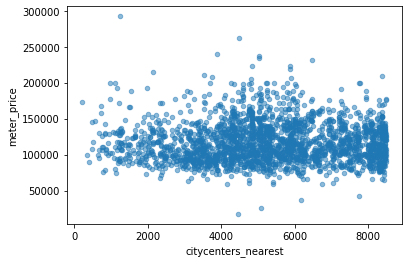

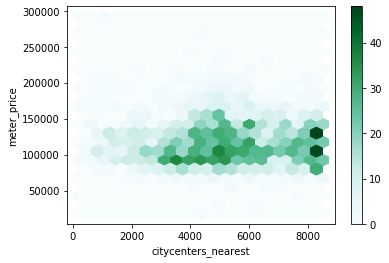

0.0042740709750388964


In [76]:
dependence_piter_center ('citycenters_nearest')

В центральной зоне (0-8 км.) цена за метр квадратный почти никак не меняется в зависимости от расстояния. В отличие от основной выборки, где коэффициент корреляции пирсона = -0,397.

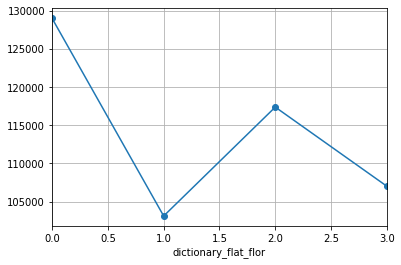

0.024911422976082065


In [77]:
dependence_3('dictionary_flat_flor')

Медианная цена за м² первого этажа имеет наименьшую стоимость, на 4,8% дороже стоит м² последнего этажа, другие этажи стоят примерно на 14,6% дороже первого. Примерно тоже самое что и в общей выборке.

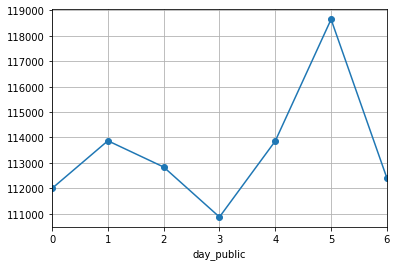

0.02735162764204166


In [78]:
dependence_3('day_public')

Обратная ситуация общей выборке - в выходной день цена квадратного метра презентуемого жилья немного больше чем в будни и воскресенье.

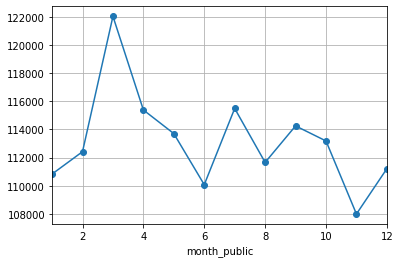

-0.04712727281310419


In [79]:
dependence_3('month_public')

Месяц публикации не влияет на цену м² исходя из коэффициента кореляции, но по графику видно, что наиболее дешего стоит м² квартир, выставляемых на продажу в 6 и 11 месяцах, причем разница составляет порядка 2%. Пиковое значени примерно на 6% больше среднего по месяцам в 3-ий месяц. Возможно это связано с колебаниями на рынке недвижимости. Кореляция увеличилась относительно изначальной выборки.

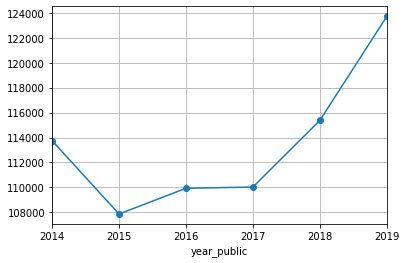

0.11867232801616595


In [80]:
dependence_3('year_public')

Все почти что тоже самое, что и в начальной выборке, только коэффициент корреляции примерно на 30% больше.

### Шаг 5. Общий вывод

Типичная цена квартир в выборке 3,5 - 6,8 млн. Большое стандартное отклонение, следовательно разброс значений большой (в нашем случае есть несколько квартир сильно отличающихся по площади от стандарта).

Типичная площадь квартир в выборке 30 - 70 м². Большое стандартное отклонение, следовательно разброс значений большой (в нашем случае есть несколько квартир сильно отличающихся по площади от стандарта).

Подавляющее большинство квартиры не студии.

больше всеего квартир из Санкт-петербурга

Больше всего положительно влияют на стоимость квартиры соответственно: цена м², общая площадь квартиры, количество комнат, этаж и число фотографий в объявление. Фактор наиболее сильно отрицательно влияющий на цену - это удаленность от центра. Видно, что жилая и кухонная площадь положительно коррелируют с ценой, однако чем больше эти площади относительно общей площади тем цена ниже. Следовательно факторы жилой и общей площади не стоит рассматривать отдельно, они оказывают положительное влияние на цену только потому, что увеличивается общая площадь, но при увеличение своей доли относительно общей могут повлиять негативно.

Все характеристики квартир больше в центре Питера чем по все выборке: цена, высота потолков и количество комнта различаются сильно, общая площадь немного отличается.

Кореляция между ценой м² и выделенными факторами немного выше у квартир в центре Питера чем в общей выборке. 